Initial partition: [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
Initial cut: 8
Final partition: [0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3]
Final cut: 8


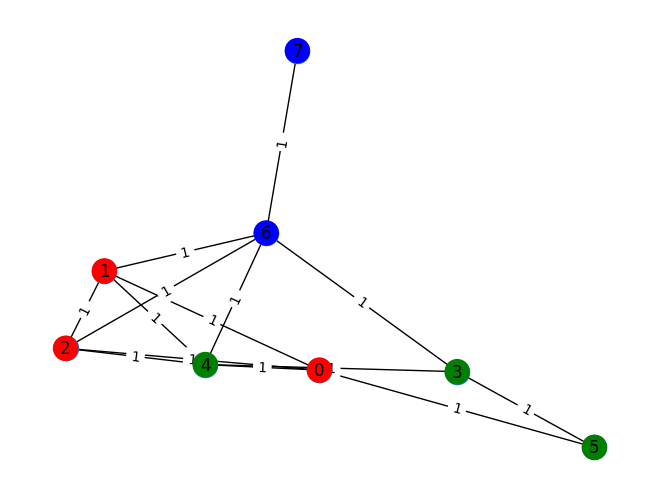

In [9]:
from disqco.parti.fgp.fgp_roee import *
from qiskit.circuit.library import QuantumVolume, QFT
from qiskit import transpile
import time
from disqco.circuits.cp_fraction import *

# Define the number of qubits and the circuit
num_qubits = 8
# circuit = QuantumVolume(num_qubits, depth=5, seed=10)

circuit = cp_fraction(num_qubits, num_qubits, fraction=0.5)

# circuit = QFT(num_qubits, do_swaps=False)

# circuit = cp_fraction(num_qubits, num_qubits, fraction=0.5)
# Transpile the circuit into some basis gates. The gate set here was used to match those used in teh GCP paper, but it shouldn't matter which gates are used.
# basis_gates = ['cx','h', 'rz']

basis_gates = ['cp','u']

transpiled_circuit = transpile(circuit, basis_gates=basis_gates)
# Define the number of partitions
num_partitions = 4

# Define the QPU sizes in terms of data qubit capacity, here they are defined to be equal and match the number of qubits in the circuit.
# Note that if the number of qubits in the circuit is odd, fully local partitions can be impossible. 
# E.g. if you have a 9 qubit circuit and 3x3 qubit QPUs, then you can't accomodate 4 pairs of qubits interacting at the same time, so you need to increase the size of the QPUs.

qpu_sizes = [int(num_qubits/num_partitions)+1 for _ in range(num_partitions)]


initial_partition = set_initial_partition_fgp(qpu_info=qpu_sizes,num_partitions=num_partitions)

print(f"Initial partition: {initial_partition}")

interactions = circuit_to_slices(transpiled_circuit, remove_singles=True)
full_graph = create_full_interaction_graph(num_qubits, interactions)

color_list = ['r', 'g', 'b', 'y', 'c', 'm', 'k']


edge_labels = {(u,v) : full_graph[u][v]['weight'] for u, v in full_graph.edges()}

pos = nx.spring_layout(full_graph)

node_colors = [color_list[initial_partition[i]] for i in range(num_qubits)]

nx.draw(full_graph, pos=pos, with_labels=True)
nx.draw_networkx_nodes(full_graph, pos=pos, node_color=node_colors)
nx.draw_networkx_edge_labels(full_graph, pos=pos, edge_labels=edge_labels)



initial_cut = calculate_static_cut(initial_partition, full_graph)
print(f"Initial cut: {initial_cut}")

final_partition, mapping = run_initial_OEE(full_graph=full_graph,initial_partition=initial_partition, qpu_info=qpu_sizes)


print(f"Final partition: {final_partition}")

final_cut = calculate_static_cut(final_partition, full_graph)
print(f"Final cut: {final_cut}")


{(0, 5): Text(0.030280417643944624, 0.6135972032013519, '1'),
 (0, 4): Text(0.1516920316962873, 0.24995593661904802, '1'),
 (0, 1): Text(0.3136551303097499, 0.11143907537798303, '1'),
 (0, 2): Text(0.3692930963147145, 0.23148143314983982, '1'),
 (1, 2): Text(0.40308417707545396, -0.08928431566367911, '1'),
 (1, 4): Text(0.18549438999416878, -0.07081883302783942, '1'),
 (1, 6): Text(0.12226713698032465, -0.2815139189702094, '1'),
 (2, 6): Text(0.1779039444303151, -0.16146122217663672, '1'),
 (2, 4): Text(0.24112722235075135, 0.04923588040287963, '1'),
 (3, 6): Text(-0.26432325091041686, -0.05816445715223817, '1'),
 (3, 5): Text(-0.32251239703083945, 0.5161696957060862, '1'),
 (3, 4): Text(-0.20109987195567253, 0.15253141959822947, '1'),
 (4, 6): Text(-0.0396913780357529, -0.1429958109814895, '1'),
 (6, 7): Text(-0.23226576363438522, -0.6768446736668429, '1')}

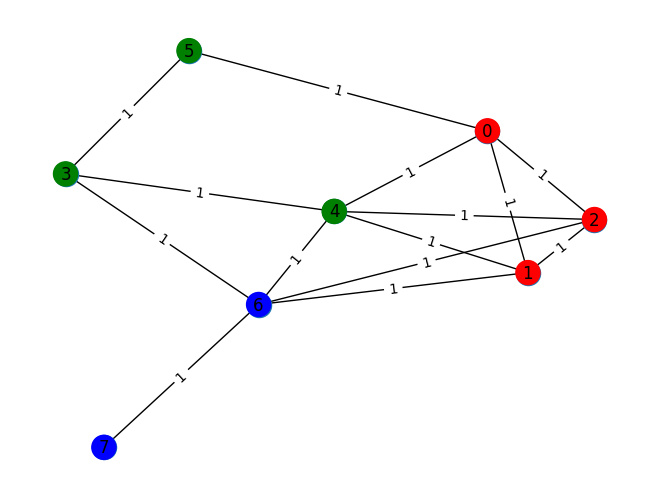

In [10]:

pos = nx.spring_layout(full_graph)

node_colors = [color_list[final_partition[i]] for i in range(num_qubits)]

nx.draw(full_graph, pos=pos, with_labels=True)
nx.draw_networkx_nodes(full_graph, pos=pos, node_color=node_colors)
nx.draw_networkx_edge_labels(full_graph, pos=pos, edge_labels=edge_labels)

